In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')
df2 = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')

#df1.head()
df2.head()



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df1.columns = ['id','title','cast','crew']
df2=df2.merge(df1,on='id')
df2.head()
C = df2['vote_average'].mean()
# print(C)


In [4]:
m = df2['vote_count'].quantile(0.9)
print(m)


1838.4000000000015


In [5]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [6]:
def weighted_rating(x, m=m, C=C):
  v = x['vote_count']
  R = x['vote_average']

  return ((v/v+m)*R)+ ((m/v+m)*C)


In [7]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies = q_movies.sort_values('score', ascending=False)
q_movies.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",26836.113198
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.thegodfather.com/,238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893,The Godfather,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",26652.708729
2731,13000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,240,"[{""id"": 700, ""name"": ""italo-american""}, {""id"":...",en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,The Godfather: Part II,"[{""cast_id"": 8, ""character"": ""Don Michael Corl...","[{""credit_id"": ""52fe422bc3a36847f8009501"", ""de...",26470.223452
2294,15000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://movies.disney.com/spirited-away,129,"[{""id"": 616, ""name"": ""witch""}, {""id"": 970, ""na...",ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,"[{""name"": ""Studio Ghibli"", ""id"": 10342}]",...,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,Spirited Away,"[{""cast_id"": 3, ""character"": ""Chihiro (voice)""...","[{""credit_id"": ""571e4beec3a3683393000236"", ""de...",26469.784822
3865,3300000,"[{""id"": 18, ""name"": ""Drama""}]",http://sonyclassics.com/whiplash/,244786,"[{""id"": 1416, ""name"": ""jazz""}, {""id"": 1523, ""n...",en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,"[{""name"": ""Bold Films"", ""id"": 2266}, {""name"": ...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,Whiplash,"[{""cast_id"": 5, ""character"": ""Andrew Neimann"",...","[{""credit_id"": ""54d5356ec3a3683ba0000039"", ""de...",26469.500975
1818,22000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.schindlerslist.com/,424,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1631,...",en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,Schindler's List,"[{""cast_id"": 14, ""character"": ""Oskar Schindler...","[{""credit_id"": ""52fe4242c3a36847f8010303"", ""de...",26469.455362
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,"[{""iso

In [8]:
pop = df2.sort_values('popularity',ascending=False)
pop.head(10)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de..."
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,Guardians of the Galaxy,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de..."
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de..."
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,Jurassic World,"[{""cast_id"": 10, ""character"": ""Owen Grady"", ""c...","[{""credit_id"": ""52fe4bf7c3a368484e1a0683"", ""de..."
199,140000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneyvideos/liveaction/p...,22,"[{""id"": 911, ""name"": ""exotic island""}, {""id"": ...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,143.0,"[{""iso_639_1"": ""e

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Popular Movies')

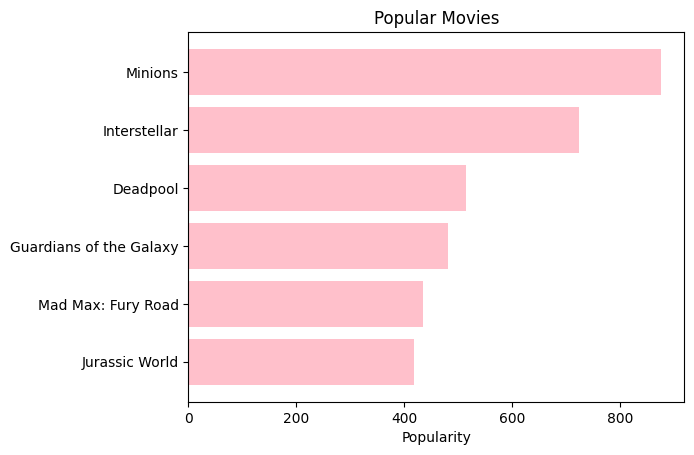

In [10]:
plt.barh(pop['original_title'].head(6), pop['popularity'].head(6),align='center',color='pink')

plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.title('Popular Movies')


In [11]:
df2['overview'].head(10)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
5    The seemingly invincible Spider-Man goes up ag...
6    When the kingdom's most wanted-and most charmi...
7    When Tony Stark tries to jumpstart a dormant p...
8    As Harry begins his sixth year at Hogwarts, he...
9    Fearing the actions of a god-like Super Hero l...
Name: overview, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf only works on text
tfidf = TfidfVectorizer(stop_words='english')
df2 ['overview'] = df2['overview'].fillna('')

tf1df_matrix = tfidf.fit_transform(df2 ['overview'])
print(tf1df_matrix)
tf1df_matrix.shape

  (0, 3545)	0.27493285363270825
  (0, 795)	0.2084074203878777
  (0, 14754)	0.26556705630591243
  (0, 13355)	0.2537072195025191
  (0, 7414)	0.2153609580612842
  (0, 19054)	0.23864791282019557
  (0, 12269)	0.1778447209530258
  (0, 19671)	0.24152597853522884
  (0, 13644)	0.29248619979162926
  (0, 12411)	0.27155366980600426
  (0, 5519)	0.27863433071832444
  (0, 11667)	0.2580267910376776
  (0, 13680)	0.3411386462681145
  (0, 3232)	0.19886014555883547
  (0, 225)	0.3055534742040413
  (1, 14969)	0.2764509091386784
  (1, 18376)	0.37466189442120984
  (1, 6188)	0.2743698871995736
  (1, 19418)	0.3060153616124342
  (1, 6016)	0.1966138874334538
  (1, 6069)	0.2948248727159851
  (1, 8674)	0.2809447973706985
  (1, 11025)	0.12158034118460531
  (1, 3843)	0.19195626583733216
  (1, 4854)	0.19967394354414503
  :	:
  (4802, 5841)	0.34247058916908363
  (4802, 4576)	0.15002600185636672
  (4802, 10126)	0.15121328276821538
  (4802, 16409)	0.17123529458454181
  (4802, 4816)	0.14223771161926407
  (4802, 1311)	0.16

(4803, 20978)

In [13]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tf1df_matrix, tf1df_matrix)
#linear_kernel is fast but less accurate, sklearn is vice-versa
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.02160533 0.         0.        ]
 [0.         0.         1.         ... 0.01488159 0.         0.        ]
 ...
 [0.         0.02160533 0.01488159 ... 1.         0.01609091 0.00701914]
 [0.         0.         0.         ... 0.01609091 1.         0.01171696]
 [0.         0.         0.         ... 0.00701914 0.01171696 1.        ]]


In [14]:
indices = pd.Series(df2.index, index= df2['original_title']).drop_duplicates()
#drop_duplicates drop duplicate values, same movies as they match completely , avatar=avatar is 1 & pd.series converts 2D data into 1D
print(indices)

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64


In [15]:
def get_recommendations(title,cosine_sim=cosine_sim):
  idx = indices[title]
  print(idx)
  sim_scores = list(enumerate(cosine_sim[idx]))
  print('\nfirst: '+ str(sim_scores))

  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  print('\nsecod: ' + str(sim_scores))

  sim_scores = sim_scores[1:11]

  print('\nthird: ' + str(sim_scores))

  #Get the movie indices
  movie_indices = [i[0] for i in sim_scores]

  print('\nFinal Indices' + str(movie_indices))

  print('\n\n\n')

  #Return the top 10 most similar movies
  return df2['original_title'].iloc[movie_indices]

In [16]:
get_recommendations('The Dark Knight Rises')

3

first: [(0, 0.0249951158376727), (1, 0.0), (2, 0.0), (3, 1.0), (4, 0.010433403719159354), (5, 0.0051446018158107934), (6, 0.01260063243546246), (7, 0.026954270578912674), (8, 0.02065221688538951), (9, 0.1337400906655523), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.004071333922512107), (16, 0.021121093874993183), (17, 0.0), (18, 0.006768893195007471), (19, 0.010765175685064708), (20, 0.007178266390761152), (21, 0.033380775071488206), (22, 0.0), (23, 0.0), (24, 0.019238168304196293), (25, 0.017013388161368177), (26, 0.018845673291717265), (27, 0.0), (28, 0.008351231142809445), (29, 0.02582248131068942), (30, 0.017549884233472455), (31, 0.029947529512076927), (32, 0.021708602796233892), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.028418448812136628), (37, 0.0), (38, 0.030631547964966054), (39, 0.01088522587631032), (40, 0.0), (41, 0.021109848007927), (42, 0.008087287409335878), (43, 0.0), (44, 0.0), (45, 0.008667206203132952), (46, 0.0), (47, 0.008370116577193958), (48, 

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object

In [17]:
def t(title):
 new = [df2['original_title'].str.lower()]
 return new

x = t('Avatar')
print(x)
#create a new column with lower case and then match it w that column



[0                                         avatar
1       pirates of the caribbean: at world's end
2                                        spectre
3                          the dark knight rises
4                                    john carter
                          ...                   
4798                                 el mariachi
4799                                   newlyweds
4800                   signed, sealed, delivered
4801                            shanghai calling
4802                           my date with drew
Name: original_title, Length: 4803, dtype: object]


In [18]:
#eval helps to evaluate and parse its inbuilt in python & literaleval helps to catch error
from ast import literal_eval
#ast is abstract syntax tree , parser trees
features = ['cast','crew','keywords','genres']
for feature in features:
  df2[feature] = df2[feature].apply(literal_eval)


In [19]:
def get_director(x):
  for i in x:
    if i['job'] == 'Director':
      return i['name']
    return np.nan

In [20]:
def get_list(x):
  if isinstance(x,list):
    names=[i ['name'] for i in x]
    if len(names)>3:
      names=names[:3]
    return names
  return[]

In [21]:
df2['director']=df2['crew'].apply(get_director)

features = ['cast','keywords','genres']
for feature in features:
  df2[feature]=df2[feature].apply(get_list)

In [22]:
df2[['original_title','cast','director','keywords','genres']].head(3)

,original_title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",NaN,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",NaN,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",NaN,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [23]:
def clean_data(x):
  if isinstance(x,list):
    return [str.lower(i.replace(" ",""))for i in x]
  else:
    #checks if director exists. If not, return empty string
    if isinstance(x,str):
      return str.lower(x.replace(" ",""))
    else:
      return ''

In [45]:
features = ['cast','keywords','director','genres']

for feature in features:
   df2[feature] = df2[feature].apply(clean_data)


In [49]:
df2['keywords'].head()

0       [cultureclash, future, spacewar]
1       [ocean, drugabuse, exoticisland]
2       [spy, basedonnovel, secretagent]
3    [dccomics, crimefighter, terrorist]
4        [basedonnovel, mars, medallion]
Name: keywords, dtype: object

In [50]:
def create_soup(x) :
  return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['director']) + ' ' + ' '.join(x['genres'])

df2['soup'] = df2.apply(create_soup, axis=1)

In [51]:
df2['soup'].head()

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df2['soup'])

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [59]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['original_title'])

In [61]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

3

first: [(0, 0.1111111111111111), (1, 0.1111111111111111), (2, 0.2222222222222222), (3, 1.0000000000000002), (4, 0.1111111111111111), (5, 0.1111111111111111), (6, 0.0), (7, 0.1111111111111111), (8, 0.0), (9, 0.2222222222222222), (10, 0.2222222222222222), (11, 0.1111111111111111), (12, 0.1111111111111111), (13, 0.1111111111111111), (14, 0.2222222222222222), (15, 0.0), (16, 0.1111111111111111), (17, 0.1111111111111111), (18, 0.1111111111111111), (19, 0.1111111111111111), (20, 0.1111111111111111), (21, 0.1178511301977579), (22, 0.0), (23, 0.0), (24, 0.2222222222222222), (25, 0.1111111111111111), (26, 0.1111111111111111), (27, 0.1111111111111111), (28, 0.1111111111111111), (29, 0.1111111111111111), (30, 0.10540925533894598), (31, 0.2222222222222222), (32, 0.0), (33, 0.1111111111111111), (34, 0.0), (35, 0.1111111111111111), (36, 0.1111111111111111), (37, 0.0), (38, 0.1111111111111111), (39, 0.1111111111111111), (40, 0.1111111111111111), (41, 0.2222222222222222), (42, 0.0), (43, 0.22222222

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3073           Romeo Is Bleeding
1986                      Faster
3326              Black November
1503                      Takers
303                     Catwoman
747               Gangster Squad
1149             American Hustle
Name: original_title, dtype: object